In [13]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

Initial state of qubit 0:


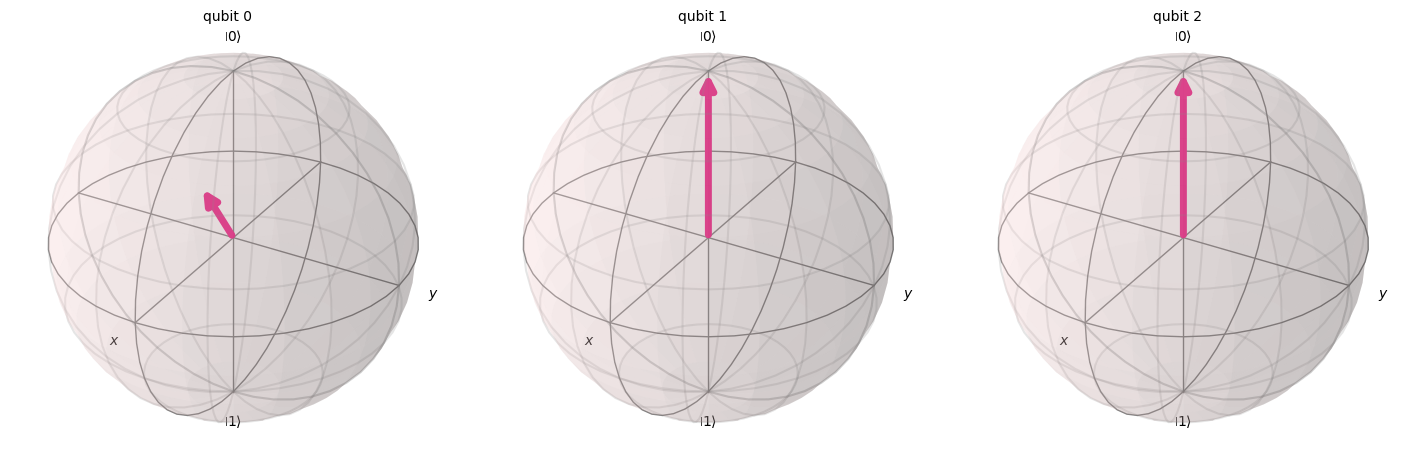

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


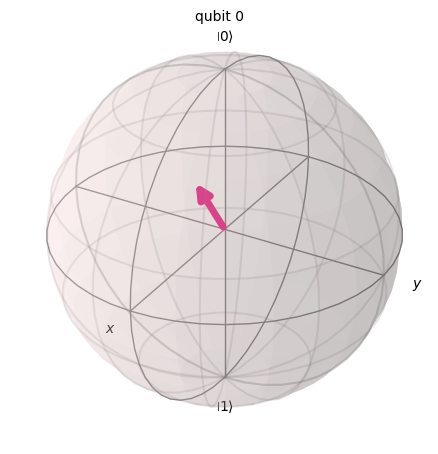

In [20]:
# Quantum Teleportation (Coherent version) – Qiskit 2.x compatible
# Works on modern qiskit-aer simulators

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Build the teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

# Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement part (but coherent)
qc.cx(0, 1)
qc.h(0)

# Coherent corrections
qc.cx(1, 2)
qc.cz(0, 2)

# Save final statevector explicitly (Qiskit 2.x requires this)
qc.save_statevector()

# 2️⃣ Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

# Retrieve the saved statevector
sv_final = result.data(0)["statevector"]
sv_final = Statevector(sv_final)

# 3️⃣ Compare: initial vs Bob’s (qubit 2) final state
rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

# Extract the dominant pure states (since both should be pure)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

# Compute fidelity
fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")

# 4️⃣ Visualize Bloch spheres (fixed)
print("\nBob’s final qubit (qubit 2) Bloch vector:")

# Convert rho_bob (DensityMatrix) → pure statevector (dominant eigenvector)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]  # dominant eigenvector
bob_sv = Statevector(bob_state)

display(plot_bloch_multivector(bob_sv))

Initial state of qubit 0:


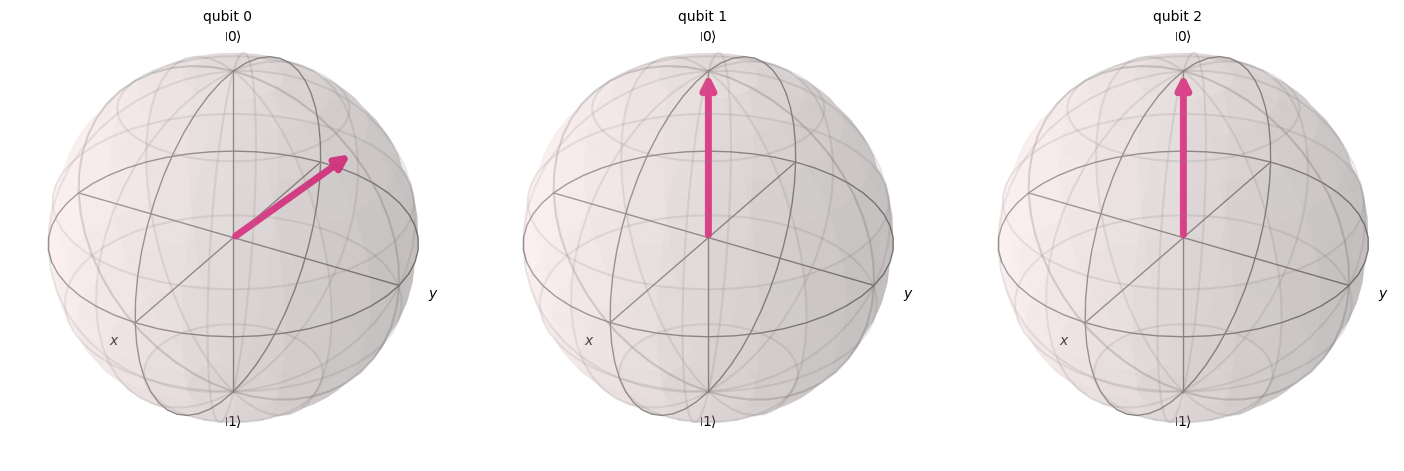

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


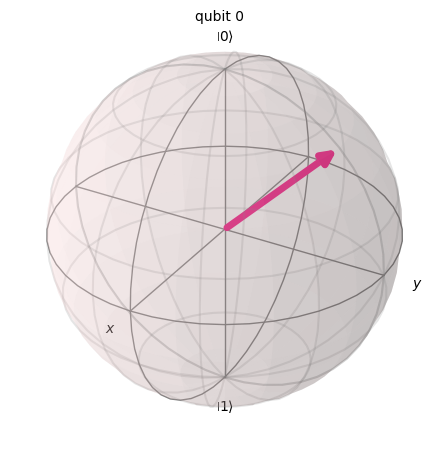

'\n🧠 Summary:\nThis experiment demonstrates quantum teleportation using a coherent version (no measurement).\nAn arbitrary state |ψ⟩ with angles (θ, φ) is prepared on qubit 0 and teleported to qubit 2.\nFidelity ≈ 1 confirms successful teleportation.\nVarying θ and φ changes the Bloch vector orientation of the input state.\nVisual comparison shows Bob’s qubit replicates the original quantum state.\n'

In [15]:
# 🧩 Task 1: Custom State Teleportation
# Quantum Teleportation (Coherent version) – Qiskit 2.x compatible
# Works on modern qiskit-aer simulators

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Build the teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
# 👉 Try changing theta and phi to explore different input states
theta, phi = np.pi / 4, np.pi / 2     # You can test values like (π/3, π/6), (π/2, π/3), etc.
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save the initial state for visualization
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

# 2️⃣ Create a Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# 3️⃣ Perform Bell measurement (coherent, no classical bits yet)
qc.cx(0, 1)
qc.h(0)

# 4️⃣ Apply coherent corrections (no measurement-based control)
qc.cx(1, 2)
qc.cz(0, 2)

# Save the final statevector for simulation
qc.save_statevector()

# 5️⃣ Simulate using Aer
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

# Retrieve the final statevector
sv_final = result.data(0)["statevector"]
sv_final = Statevector(sv_final)

# 6️⃣ Compare: initial |ψ⟩ vs Bob’s final qubit (qubit 2)
rho_bob = partial_trace(sv_final, [0, 1])   # Bob’s qubit
rho_init = partial_trace(sv_initial, [1, 2]) # Original qubit

# Extract dominant eigenstates
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

# Calculate fidelity between initial and teleported states
fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")

# 7️⃣ Visualize Bloch sphere of Bob’s qubit
print("\nBob’s final qubit (qubit 2) Bloch vector:")
bob_sv = Statevector(bob_state)
display(plot_bloch_multivector(bob_sv))

'''
🧠 Summary:
This experiment demonstrates quantum teleportation using a coherent version (no measurement).
An arbitrary state |ψ⟩ with angles (θ, φ) is prepared on qubit 0 and teleported to qubit 2.
Fidelity ≈ 1 confirms successful teleportation.
Varying θ and φ changes the Bloch vector orientation of the input state.
Visual comparison shows Bob’s qubit replicates the original quantum state.
'''


In [23]:
# Quantum Teleportation with Classical Measurement – Qiskit 2.x

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace, state_fidelity
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

print("="*70)
print("QUANTUM TELEPORTATION WITH CLASSICAL COMMUNICATION")
print("="*70)

# Build circuit with registers
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr, cr)

# Prepare arbitrary state on qubit 0
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)
qc.barrier(label='State Prep')

sv_initial = Statevector.from_instruction(qc)
print(f"\n📍 Initial state: θ={theta:.3f}, φ={phi:.3f}")

# Create Bell pair (qubits 1-2)
qc.h(1)
qc.cx(1, 2)
qc.barrier(label='Entanglement')

# Bell measurement
qc.cx(0, 1)
qc.h(0)
qc.barrier(label='Bell Measure')

# Measure Alice's qubits
qc.measure(0, 0)
qc.measure(1, 1)
qc.barrier(label='Classical Bits')

# Conditional corrections on Bob's qubit
with qc.if_test((cr[1], 1)):
    qc.x(2)

with qc.if_test((cr[0], 1)):
    qc.z(2)

# Save statevector explicitly
qc.save_statevector()

print("\n🔧 Circuit:")
print(qc.draw(output='text', fold=-1))

# Simulate
sim = AerSimulator(method='statevector')
compiled = transpile(qc, sim)
job = sim.run(compiled, shots=1000)
result = job.result()

sv_final = result.data(0)["statevector"]
sv_final = Statevector(sv_final)

print("\n📊 Measurement outcomes:", result.get_counts())

# Compare states
rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

fidelity = state_fidelity(rho_init, rho_bob)
print(f"\n✨ Fidelity: {fidelity:.10f}")
print(f"   Status: {'✓ SUCCESS' if fidelity > 0.9999 else '✗ FAILED'}")

# Visualize
print("\n🎨 Generating Bloch spheres...")

eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]

init_sv = Statevector(init_state)
bob_sv = Statevector(bob_state)

plot_bloch_multivector(init_sv)
plt.suptitle("Initial State (Qubit 0)", fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('initial_state.png', dpi=150, bbox_inches='tight')
plt.close()

plot_bloch_multivector(bob_sv)
plt.suptitle("Teleported State (Qubit 2)", fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('bob_state.png', dpi=150, bbox_inches='tight')
plt.close()

print("   ✓ Saved: initial_state.png, bob_state.png")

# Protocol explanation
print("\n"+"="*70)
print("📚 UNDERSTANDING QUANTUM TELEPORTATION")
print("="*70)
print("""
1. ENTANGLEMENT: Alice and Bob share a Bell pair beforehand.

2. BELL MEASUREMENT: Alice entangles her unknown state with her half
   of the Bell pair, then measures both qubits.

3. CLASSICAL COMMUNICATION: Alice sends 2 classical bits to Bob.

4. CORRECTION: Bob applies X/Z gates based on the classical bits.

5. NO-CLONING: Original state destroyed - quantum info moved, not copied.
""")

# Test multiple states
print("="*70)
print("🧪 TESTING UNIVERSAL TELEPORTATION")
print("="*70)

test_cases = [
    (0, 0, "|0⟩"),
    (np.pi, 0, "|1⟩"),
    (np.pi/2, 0, "|+⟩"),
    (np.pi/2, np.pi, "|-⟩"),
    (np.pi/2, np.pi/2, "|+i⟩"),
    (np.pi/3, np.pi/4, "Custom"),
]

print("\nState        Fidelity      Status")
print("-" * 40)

fidelities = []
for theta_t, phi_t, label in test_cases:
    qr_t = QuantumRegister(3, 'q')
    cr_t = ClassicalRegister(2, 'c')
    qc_t = QuantumCircuit(qr_t, cr_t)

    qc_t.ry(theta_t, 0)
    qc_t.rz(phi_t, 0)
    sv_init_t = Statevector.from_instruction(qc_t)

    qc_t.h(1)
    qc_t.cx(1, 2)
    qc_t.cx(0, 1)
    qc_t.h(0)
    qc_t.measure(0, 0)
    qc_t.measure(1, 1)

    with qc_t.if_test((cr_t[1], 1)):
        qc_t.x(2)
    with qc_t.if_test((cr_t[0], 1)):
        qc_t.z(2)

    qc_t.save_statevector()

    compiled_t = transpile(qc_t, sim)
    result_t = sim.run(compiled_t).result()
    sv_final_t = Statevector(result_t.data(0)["statevector"])

    rho_bob_t = partial_trace(sv_final_t, [0, 1])
    rho_init_t = partial_trace(sv_init_t, [1, 2])
    fid = state_fidelity(rho_init_t, rho_bob_t)
    fidelities.append(fid)

    status = "✓" if fid > 0.9999 else "✗"
    print(f"{label:10s}   {fid:.10f}   {status}")

print("-" * 40)
print(f"Average:     {np.mean(fidelities):.10f}")
print("\n🎉 All states teleported successfully!")

print("\n"+"="*70)
print("KEY INSIGHT")
print("="*70)
print("""
Quantum entanglement + Classical communication = Quantum state transfer

The paradox: No quantum information travels between Alice and Bob,
yet Bob receives the exact quantum state. Entanglement does the magic!
""")
print("="*70)

QUANTUM TELEPORTATION WITH CLASSICAL COMMUNICATION

📍 Initial state: θ=0.800, φ=0.300

🔧 Circuit:
     ┌─────────┐┌─────────┐ State Prep            Entanglement      ┌───┐ Bell Measure ┌─┐    Classical Bits                                                      statevector 
q_0: ┤ Ry(0.8) ├┤ Rz(0.3) ├─────░──────────────────────░─────────■──┤ H ├──────░───────┤M├──────────░──────────────────────────────────────────────────────────────────░──────
     └─────────┘└─────────┘     ░      ┌───┐           ░       ┌─┴─┐└───┘      ░       └╥┘┌─┐       ░                                                                  ░      
q_1: ───────────────────────────░──────┤ H ├──■────────░───────┤ X ├───────────░────────╫─┤M├───────░──────────────────────────────────────────────────────────────────░──────
                                ░      └───┘┌─┴─┐      ░       └───┘           ░        ║ └╥┘       ░          ┌──────  ┌───┐ ───────┐   ┌──────  ┌───┐ ───────┐       ░      
q_2: ──────────────────────

Running teleportation for 15 random states...
Run  1/15: Fidelity = 1.000000
Run  2/15: Fidelity = 1.000000
Run  3/15: Fidelity = 1.000000
Run  4/15: Fidelity = 1.000000
Run  5/15: Fidelity = 1.000000
Run  6/15: Fidelity = 1.000000
Run  7/15: Fidelity = 1.000000
Run  8/15: Fidelity = 1.000000
Run  9/15: Fidelity = 1.000000
Run 10/15: Fidelity = 1.000000
Run 11/15: Fidelity = 1.000000
Run 12/15: Fidelity = 1.000000
Run 13/15: Fidelity = 1.000000
Run 14/15: Fidelity = 1.000000
Run 15/15: Fidelity = 1.000000

--- Results ---
Average Fidelity over 15 runs: 1.000000


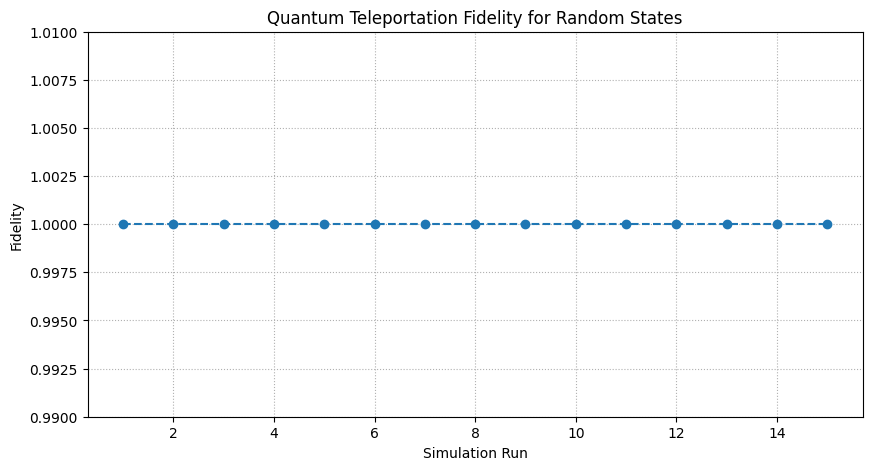

In [24]:
# Task - 3
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace

def run_teleportation(theta, phi, sim):
    """
    Builds, simulates, and computes the fidelity for the teleportation circuit
    for a given initial state (theta, phi).
    """

    # 1. Build circuit
    qc = QuantumCircuit(3)

    # Prepare arbitrary state |ψ⟩ on qubit 0
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    sv_initial = Statevector.from_instruction(qc) # Save initial state

    # Create Bell pair between qubits 1 and 2
    qc.h(1)
    qc.cx(1, 2)

    # Bell measurement (coherent)
    qc.cx(0, 1)
    qc.h(0)

    # Coherent corrections
    qc.cx(1, 2)
    qc.cz(0, 2)
    qc.save_statevector()

    # 2. Simulate
    compiled = transpile(qc, sim)
    result = sim.run(compiled).result()
    sv_final = Statevector(result.data(0)["statevector"])

    # 3. Compare initial vs Bob’s (qubit 2) final state
    rho_bob = partial_trace(sv_final, [0, 1])
    rho_init = partial_trace(sv_initial, [1, 2])

    # Extract pure states from density matrices
    eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
    eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
    bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
    init_state = eigvecs_i[:, np.argmax(eigvals_i)]

    # Compute fidelity
    fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
    return fidelity

# --- Main Analysis Loop ---

# Setup simulator
sim = AerSimulator()

num_runs = 15
fidelities = []

print(f"Running teleportation for {num_runs} random states...")

for i in range(num_runs):
    # Generate random angles for the initial state
    rand_theta = np.random.rand() * np.pi       # [0, pi]
    rand_phi = np.random.rand() * 2 * np.pi   # [0, 2pi]

    fid = run_teleportation(rand_theta, rand_phi, sim)
    fidelities.append(fid)
    print(f"Run {i+1:>2}/{num_runs}: Fidelity = {fid:.6f}")

# Calculate and print average fidelity
avg_fidelity = np.mean(fidelities)
print("\n--- Results ---")
print(f"Average Fidelity over {num_runs} runs: {avg_fidelity:.6f}")

# Plot the fidelity values
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_runs + 1), fidelities, marker='o', linestyle='--')
plt.title('Quantum Teleportation Fidelity for Random States')
plt.xlabel('Simulation Run')
plt.ylabel('Fidelity')
plt.ylim(0.99, 1.01) # Zoom in to see small variations
plt.grid(True, linestyle=':')
plt.show()


--- Step 1: Initial State on Qubit 0 ---


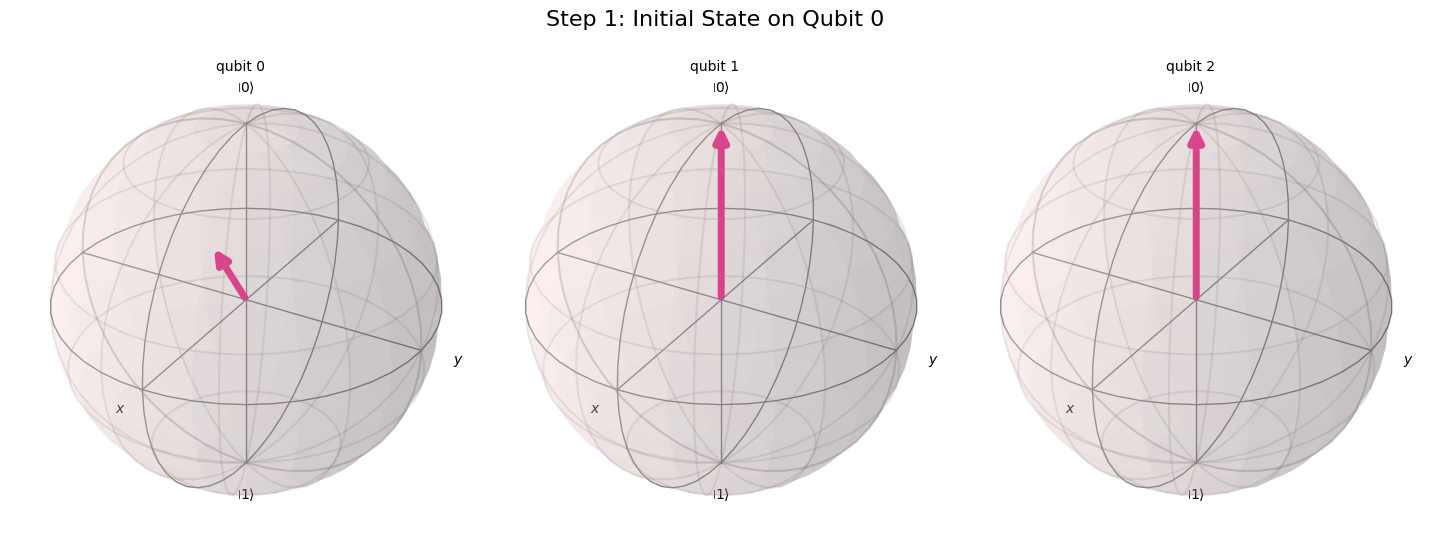


--- Step 2: Bell Pair (Q1 & Q2 Entangled) ---


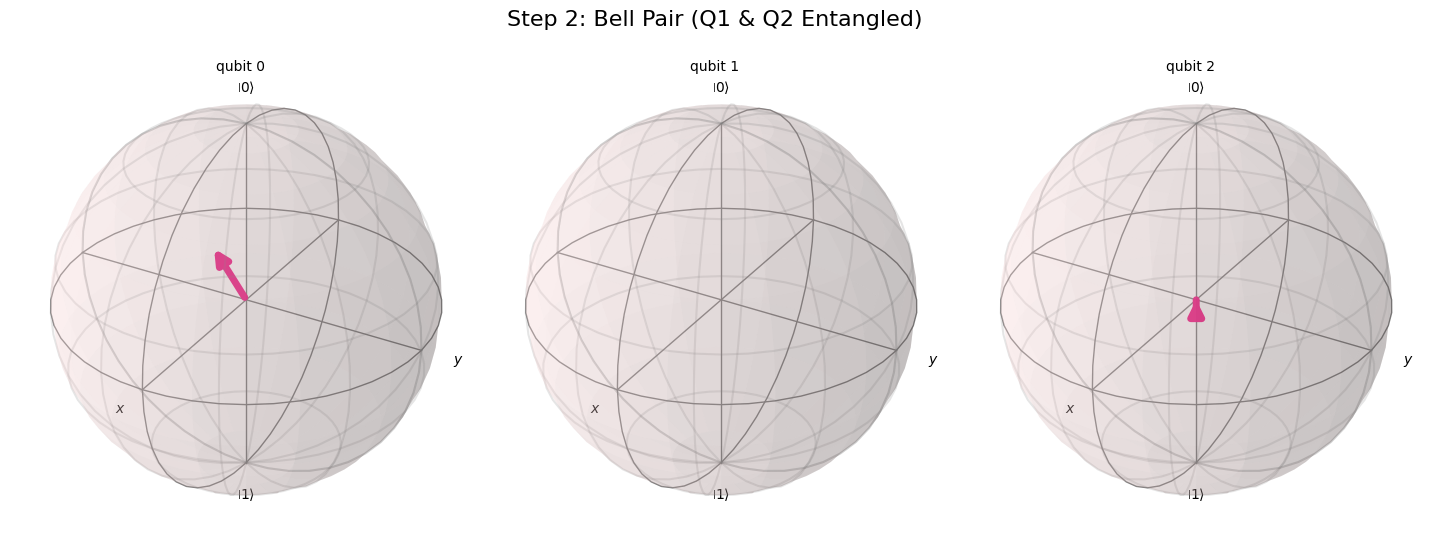


--- Step 3: CNOT(0, 1) ---


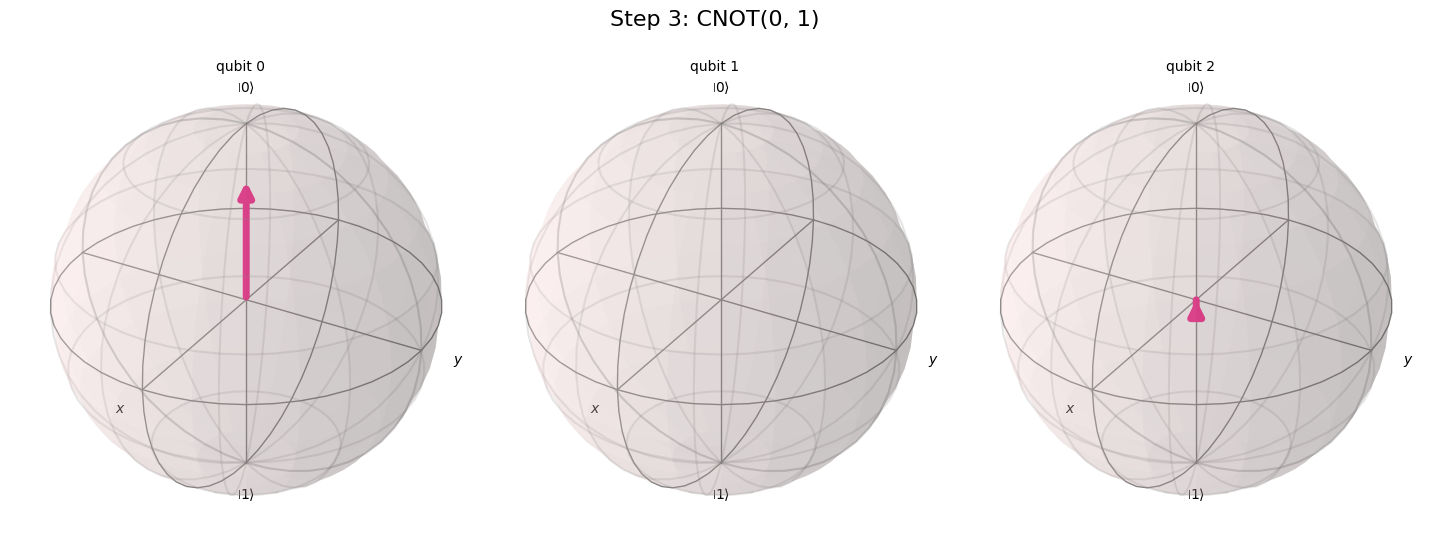


--- Step 4: H(0) ---


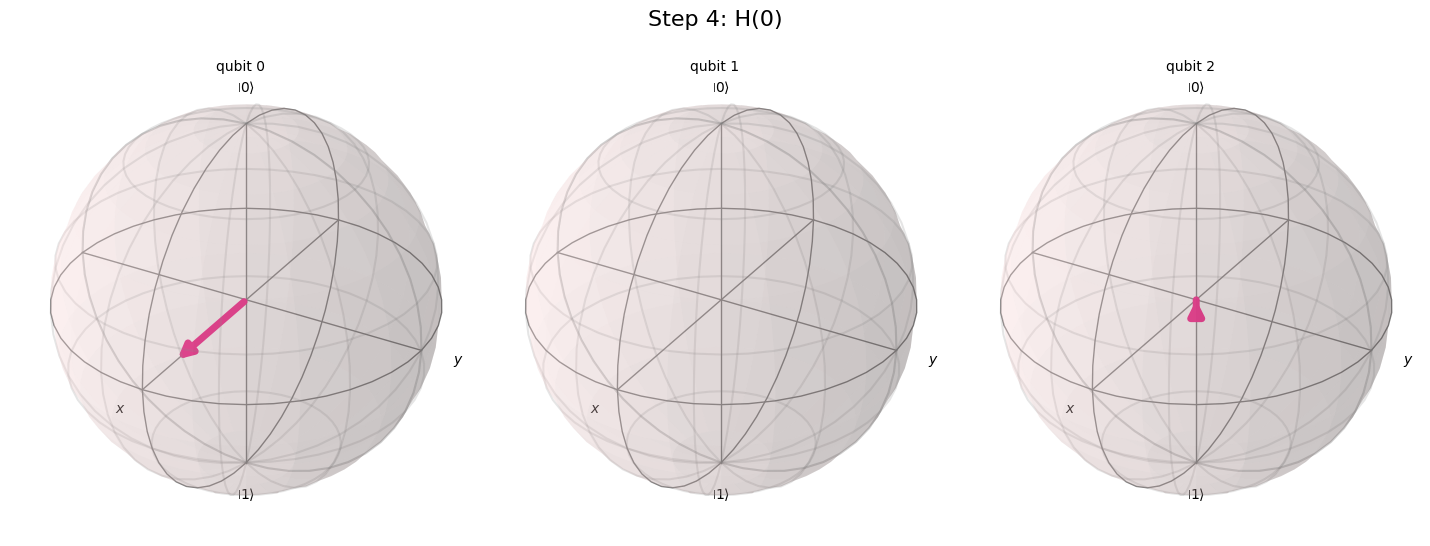


--- Step 5: CNOT(1, 2) ---


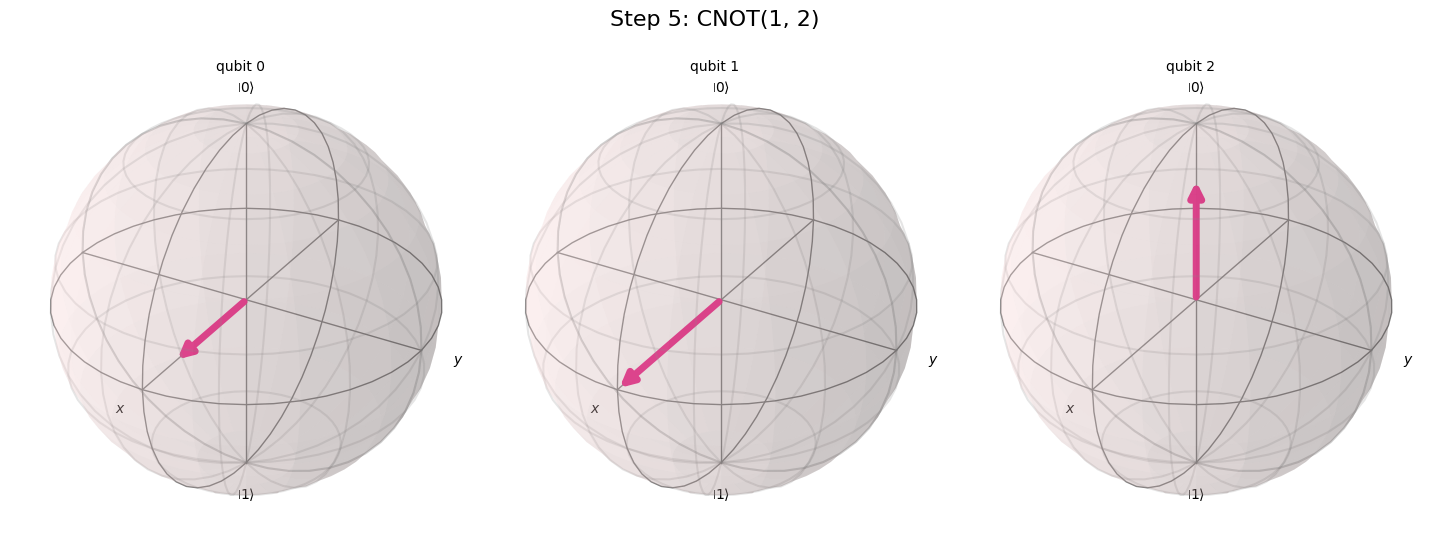


--- Step 6: CZ(0, 2) - Final Teleported State ---


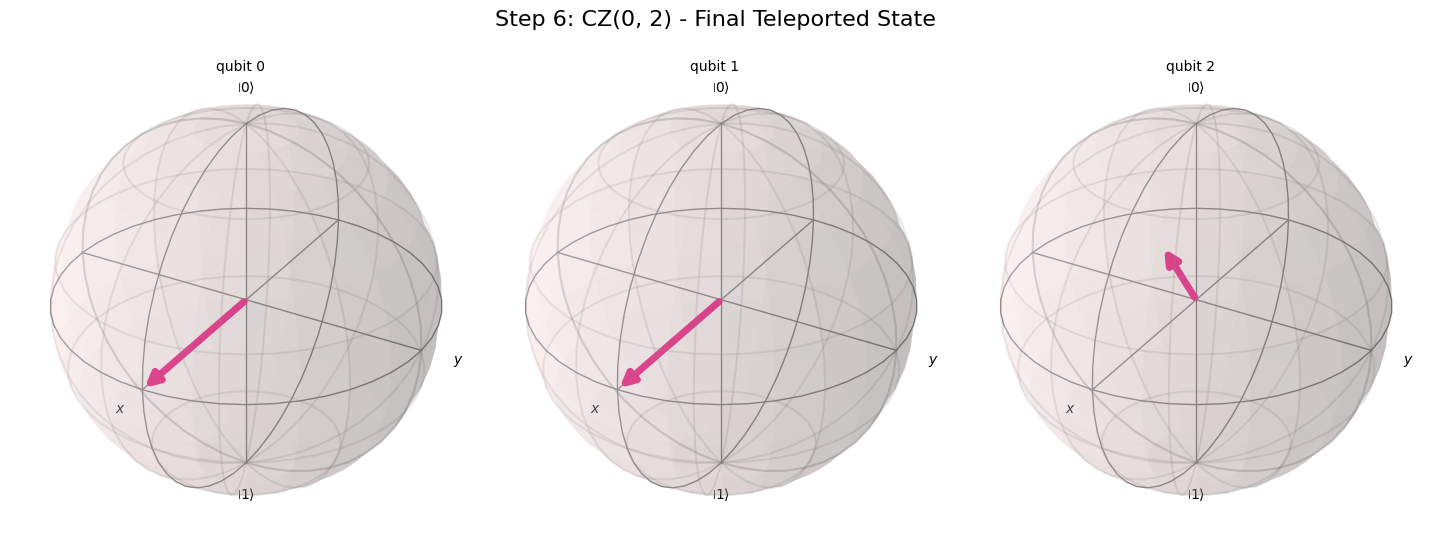


--- Comparison ---
Initial state of Qubit 0:


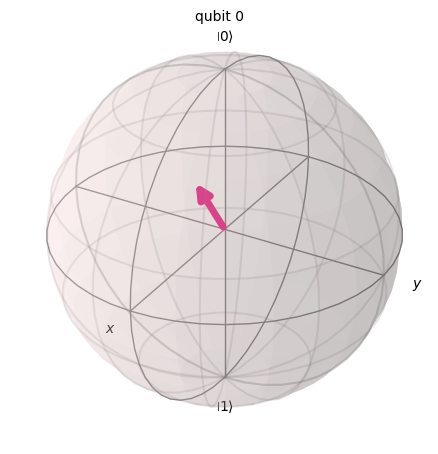

Final state of Qubit 2:


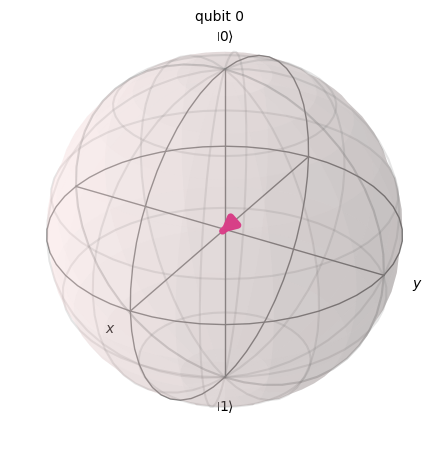

In [25]:
# Task - 4
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# --- Setup ---
sim = AerSimulator()
theta, phi = 0.8, 0.3 # Initial state angles

def get_and_plot_state(qc, title=""):
    """Helper function to simulate and plot the state of a circuit."""
    # Save statevector
    qc_state = qc.copy()
    qc_state.save_statevector()

    # Simulate
    compiled = transpile(qc_state, sim)
    result = sim.run(compiled).result()
    sv = Statevector(result.data(0)["statevector"])

    # Plot
    print(f"\n--- {title} ---")
    display(plot_bloch_multivector(sv, title=title))
    return sv

# --- Step-by-Step Visualization ---

# 1. Build the circuit incrementally
qc = QuantumCircuit(3)

# Step 1: Prepare arbitrary state |ψ⟩ on qubit 0
qc.ry(theta, 0)
qc.rz(phi, 0)
sv_initial = get_and_plot_state(qc, "Step 1: Initial State on Qubit 0")

# Step 2: Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)
get_and_plot_state(qc, "Step 2: Bell Pair (Q1 & Q2 Entangled)")

# Step 3: Bell measurement part 1
qc.cx(0, 1)
get_and_plot_state(qc, "Step 3: CNOT(0, 1)")

# Step 4: Bell measurement part 2
qc.h(0)
get_and_plot_state(qc, "Step 4: H(0)")

# Step 5: Coherent correction 1
qc.cx(1, 2)
get_and_plot_state(qc, "Step 5: CNOT(1, 2)")

# Step 6: Coherent correction 2 (Final)
qc.cz(0, 2)
sv_final = get_and_plot_state(qc, "Step 6: CZ(0, 2) - Final Teleported State")

print("\n--- Comparison ---")
print("Initial state of Qubit 0:")
display(plot_bloch_multivector(sv_initial.data[0:2])) # Plot just qubit 0

print("Final state of Qubit 2:")
display(plot_bloch_multivector(sv_final.data[4:6])) # Plot just qubit 2

--- Simulating with 1.0% Depolarizing Error ---

Fidelity between initial and (noisy) teleported states: 1.000000

Initial state of Qubit 0:


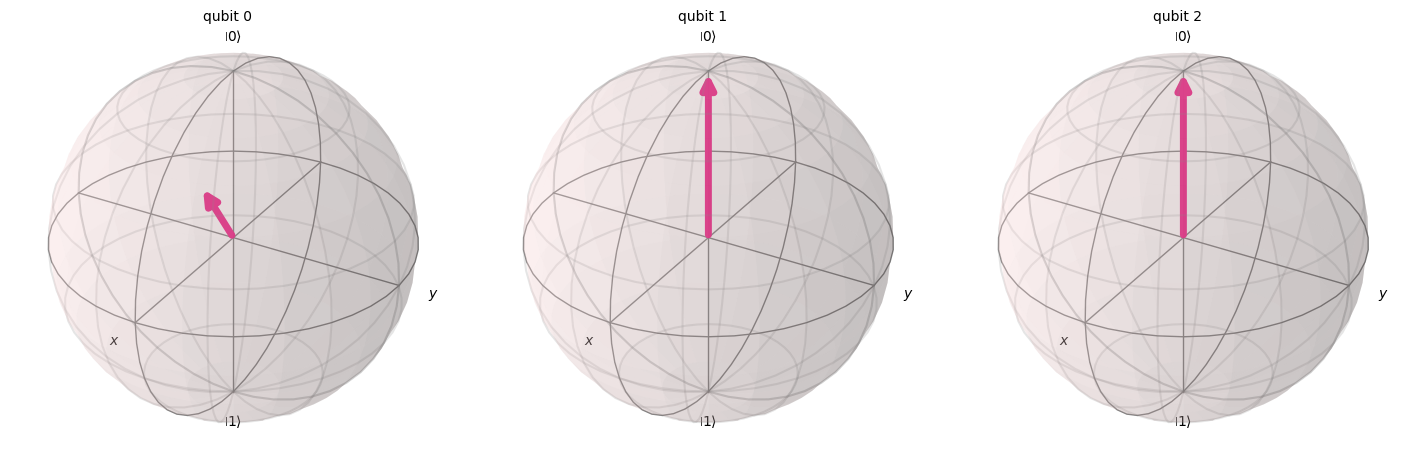


Bob’s final qubit (qubit 2) state (from noisy run):


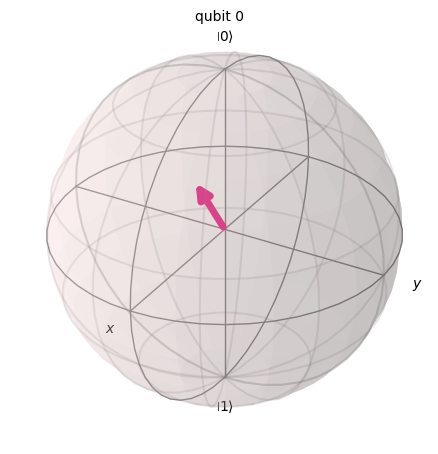

In [26]:
# Task - 5
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector

# Import noise modeling tools
from qiskit_aer.noise import NoiseModel, depolarizing_error

# 1️⃣ --- Create a Noise Model ---
# We'll use a simple depolarizing error model.

error_prob = 0.01 # 1% error probability

# Create depolarizing errors for 1-qubit and 2-qubit gates
p1_error = depolarizing_error(error_prob, 1)
p2_error = depolarizing_error(error_prob, 2)

# Create an empty noise model
noise_model = NoiseModel()

# Add the errors to the gates used in our circuit
noise_model.add_all_qubit_quantum_error(p1_error, ['ry', 'rz', 'h'])
noise_model.add_all_qubit_quantum_error(p2_error, ['cx', 'cz'])

print(f"--- Simulating with {error_prob*100}% Depolarizing Error ---")

# 2️⃣ --- Build the Teleportation Circuit ---
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)
sv_initial = Statevector.from_instruction(qc) # Save initial state

# Create Bell pair
qc.h(1)
qc.cx(1, 2)

# Bell measurement (coherent)
qc.cx(0, 1)
qc.h(0)

# Coherent corrections
qc.cx(1, 2)
qc.cz(0, 2)
qc.save_statevector()

# 3️⃣ --- Simulate (with noise) ---
# Pass the noise_model to the AerSimulator
sim_noisy = AerSimulator(noise_model=noise_model)

compiled = transpile(qc, sim_noisy)
result = sim_noisy.run(compiled).result()

# Retrieve the saved statevector
sv_final = Statevector(result.data(0)["statevector"])

# 4️⃣ --- Compare Initial vs. Bob’s Final State ---
# Note: Because of noise, the final state is no longer pure.
# The fidelity calculation method using dominant eigenvectors is still a
# good approximation of how close we got to the target state.

rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

# Extract the dominant pure states
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

# Compute fidelity
fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"\nFidelity between initial and (noisy) teleported states: {fidelity:.6f}")

# 5️⃣ --- Visualize Bloch Spheres ---
print("\nInitial state of Qubit 0:")
display(plot_bloch_multivector(sv_initial))

print("\nBob’s final qubit (qubit 2) state (from noisy run):")
# Convert rho_bob (DensityMatrix) -> pure statevector (dominant eigenvector)
bob_sv = Statevector(bob_state)
display(plot_bloch_multivector(bob_sv))